In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from keras.utils import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator #, array_to_img, img_to_array, load_img
from keras.applications import ResNet50, DenseNet121, efficientnet
from keras.optimizers import SGD, Adam
from keras.layers import Input,GlobalAveragePooling2D, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.metrics import AUC

In [ ]:
base_model = DenseNet121(
            weights='imagenet',  
            include_top=False)  
base_model.trainable = False

inputs = Input(shape=(150,150,3))
x1 = base_model(inputs, training=False)
x2 = GlobalAveragePooling2D()(x1)
x3 = Dense(10,activation="relu")(x2)
x4 = Dense(10,activation="relu")(x3)
outputs = Dense(2, activation='softmax')(x4)
model = tf.keras.Model(inputs, outputs, name='load_model')

#opt = Adam(0.0001)
#model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy', AUC()]) #tf.keras.losses.SparseCategoricalCrossentropy()

print(model.summary())

Model: "load_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                        

In [ ]:
model_path = '/content/drive/MyDrive/modelsCheckpoints/model_1.h5'

# Load the model weights
model.load_weights(model_path)

print(model.summary())

# Continue training the model
# Add your training code here

Model: "load_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                        

In [ ]:
# Access the last layer and print its weights
last_layer = model.layers[-1]
weights = last_layer.get_weights()[0]
biases = last_layer.get_weights()[1]

print("Last layer weights:")
print(weights)
print("Last layer biases:")
print(biases)

Last layer weights:
[[ 0.17412828  0.5595919 ]
 [-0.72253776 -0.0859994 ]
 [ 0.11709995 -0.08884382]
 [-0.02643102  0.48250043]
 [ 0.01332069 -0.3805535 ]
 [-0.38298336  0.64710075]
 [ 0.17108728 -0.14403701]
 [ 0.22698542  0.33038723]
 [-0.13207786  0.30082533]
 [-0.15229847 -0.10251904]]
Last layer biases:
[ 0.03635686 -0.03635687]


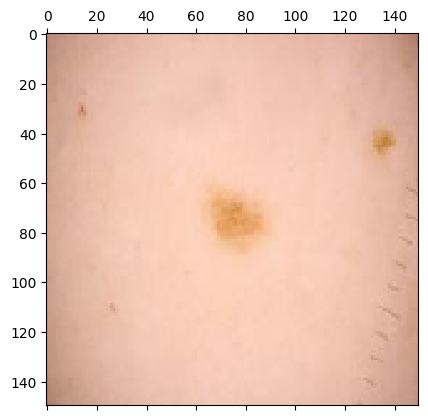

ISIC_5927617.jpg
1/1 [==============================] - 3s 3s/step
predictions:[[9.9952435e-01 4.7562167e-04]] category:0


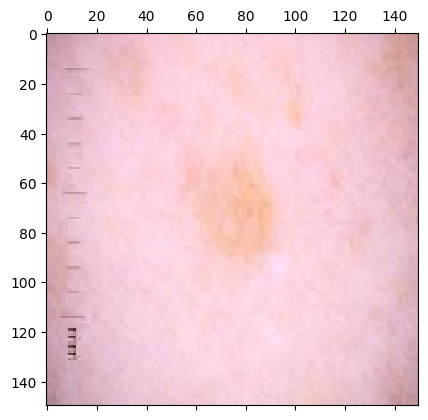

ISIC_2686026.jpg
1/1 [==============================] - 0s 158ms/step
predictions:[[0.9967098  0.00329015]] category:0


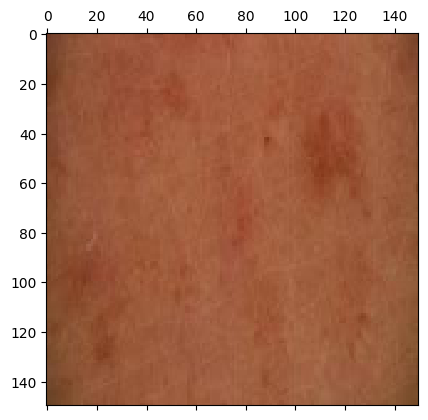

ISIC_6687327.jpg
1/1 [==============================] - 0s 93ms/step
predictions:[[0.9989034 0.0010966]] category:0


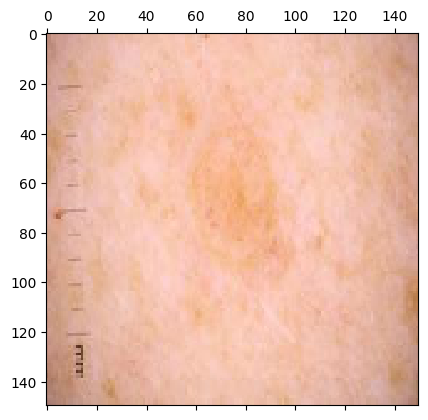

ISIC_5121178.jpg
1/1 [==============================] - 0s 112ms/step
predictions:[[0.99377924 0.00622072]] category:0


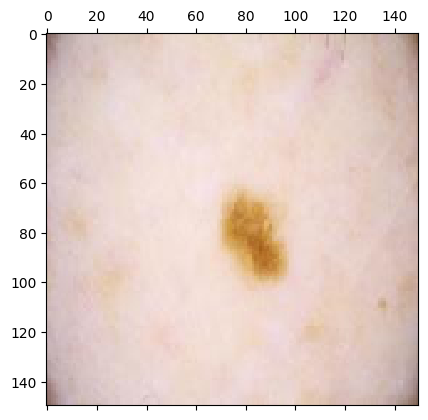

ISIC_6597839.jpg
1/1 [==============================] - 0s 106ms/step
predictions:[[0.9979145  0.00208555]] category:0


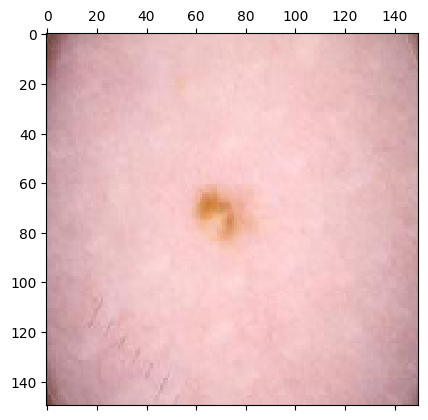

ISIC_1772784.jpg
1/1 [==============================] - 0s 91ms/step
predictions:[[0.9980646  0.00193547]] category:0


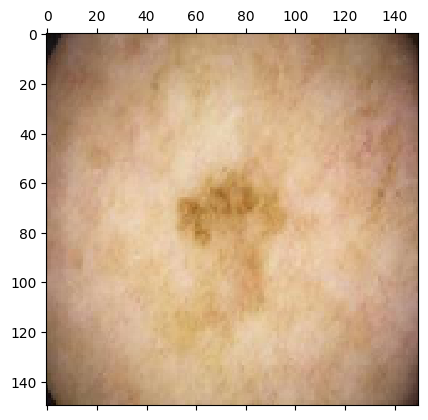

ISIC_0851556.jpg
1/1 [==============================] - 0s 91ms/step
predictions:[[0.9461606  0.05383942]] category:0


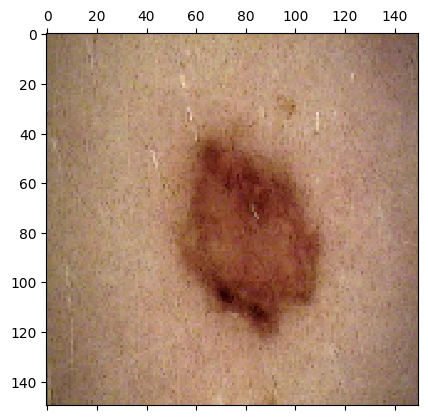

ISIC_9050826.jpg
1/1 [==============================] - 0s 110ms/step
predictions:[[0.66299564 0.33700433]] category:0


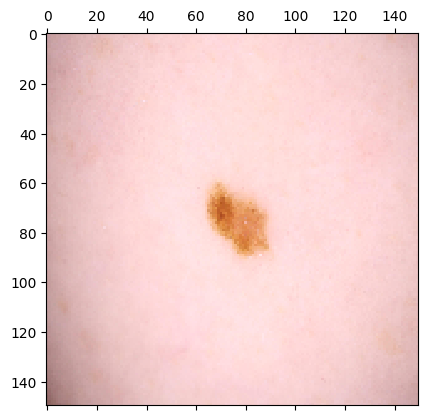

ISIC_8742407.jpg
1/1 [==============================] - 0s 100ms/step
predictions:[[0.992277   0.00772296]] category:0


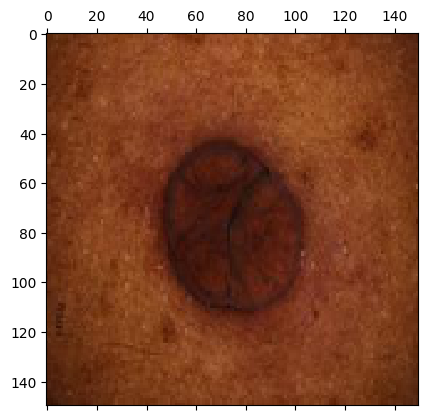

ISIC_4195990.jpg
1/1 [==============================] - 0s 103ms/step
predictions:[[0.99177355 0.00822641]] category:0


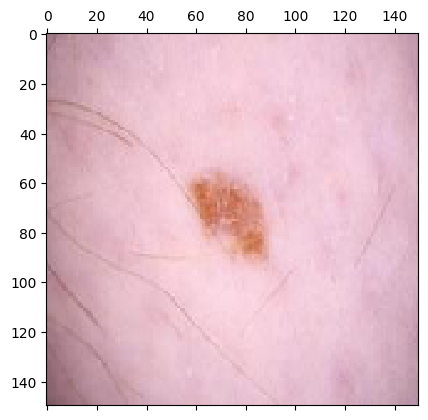

ISIC_9962534.jpg
1/1 [==============================] - 0s 116ms/step
predictions:[[0.9957208  0.00427923]] category:0


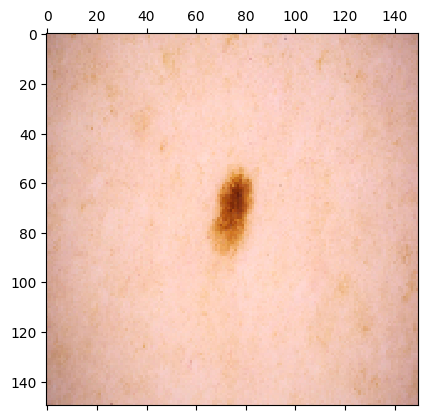

ISIC_9078369.jpg
1/1 [==============================] - 0s 92ms/step
predictions:[[0.9852197  0.01478025]] category:0


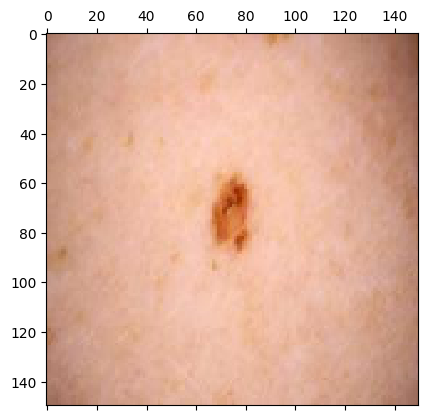

ISIC_5723176.jpg
1/1 [==============================] - 0s 179ms/step
predictions:[[0.9940502  0.00594977]] category:0


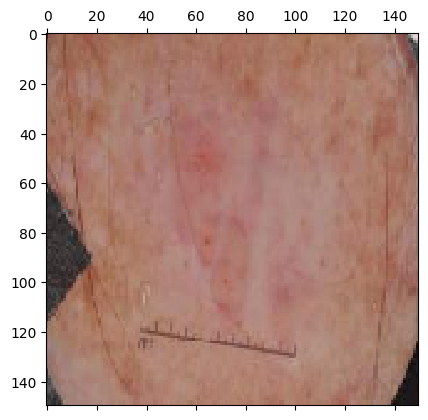

ISIC_9649028.jpg
1/1 [==============================] - 0s 208ms/step
predictions:[[0.99479055 0.00520951]] category:0


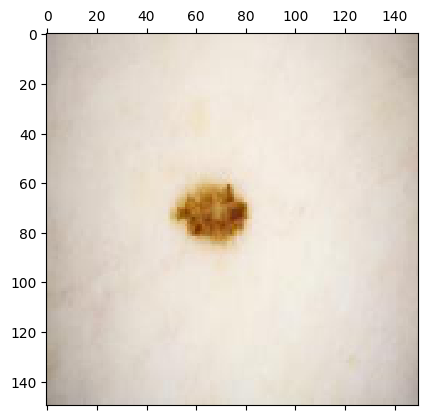

ISIC_5393367.jpg
1/1 [==============================] - 0s 93ms/step
predictions:[[9.9966955e-01 3.3041375e-04]] category:0


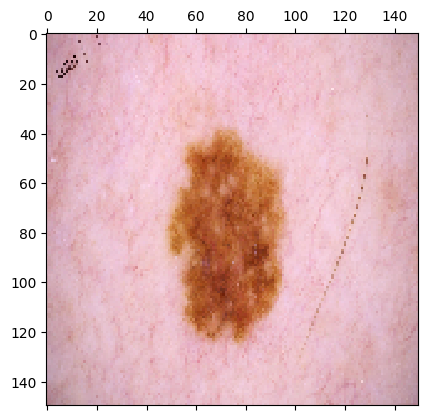

ISIC_0207268.jpg
1/1 [==============================] - 0s 96ms/step
predictions:[[0.9708543  0.02914576]] category:0


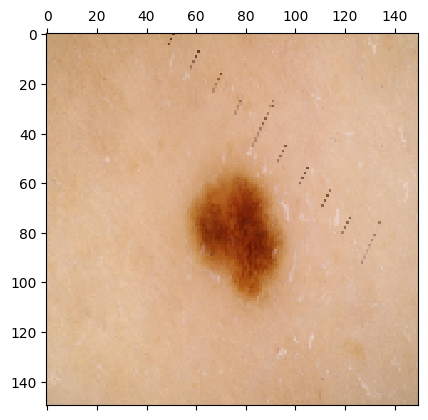

ISIC_0272509.jpg
1/1 [==============================] - 0s 96ms/step
predictions:[[0.8563374 0.1436625]] category:0


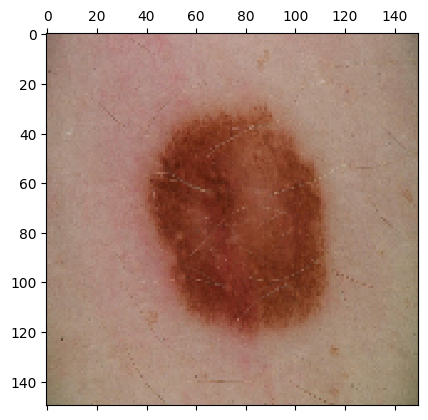

ISIC_0572205.jpg
1/1 [==============================] - 0s 104ms/step
predictions:[[0.26198715 0.73801285]] category:1


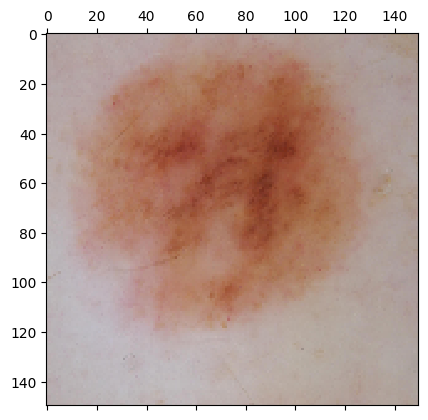

ISIC_0662000.jpg
1/1 [==============================] - 0s 114ms/step
predictions:[[0.827998   0.17200206]] category:0


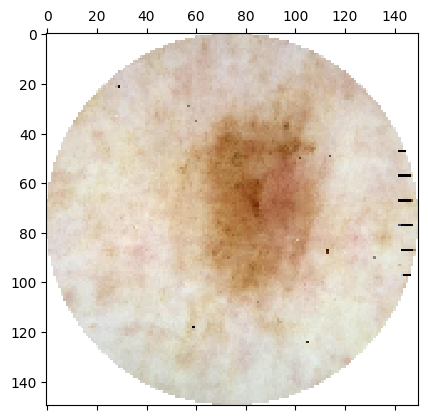

ISIC_0779920.jpg
1/1 [==============================] - 0s 99ms/step
predictions:[[0.6931328  0.30686715]] category:0


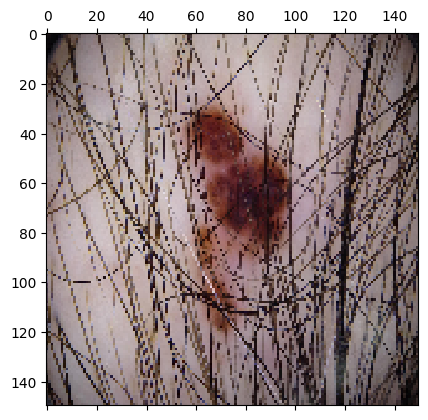

ISIC_0986600.jpg
1/1 [==============================] - 0s 110ms/step
predictions:[[0.62645787 0.37354207]] category:0


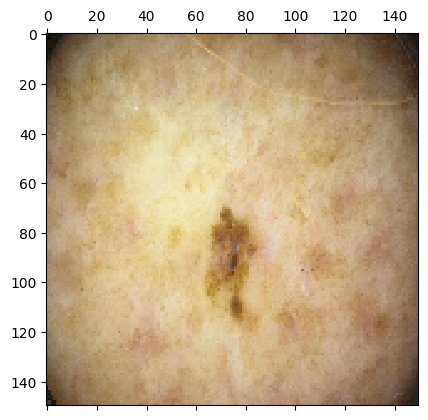

ISIC_1037315.jpg
1/1 [==============================] - 0s 98ms/step
predictions:[[0.8313387  0.16866136]] category:0


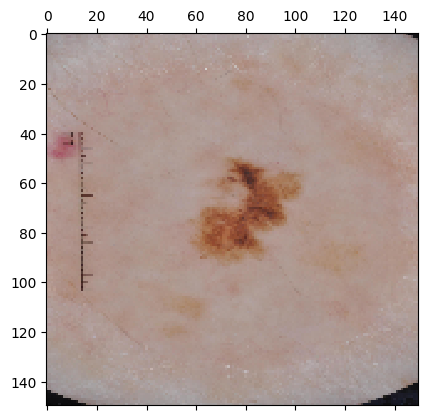

ISIC_1630301.jpg
1/1 [==============================] - 0s 93ms/step
predictions:[[0.60565615 0.39434388]] category:0


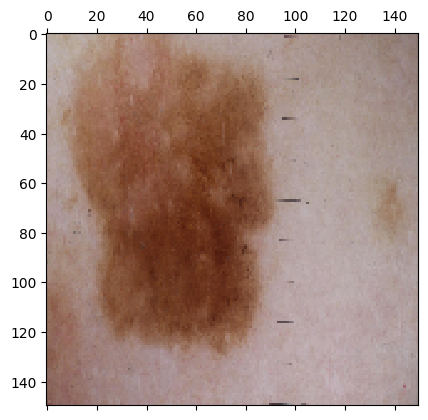

ISIC_1785627.jpg
1/1 [==============================] - 0s 158ms/step
predictions:[[0.8607637  0.13923632]] category:0


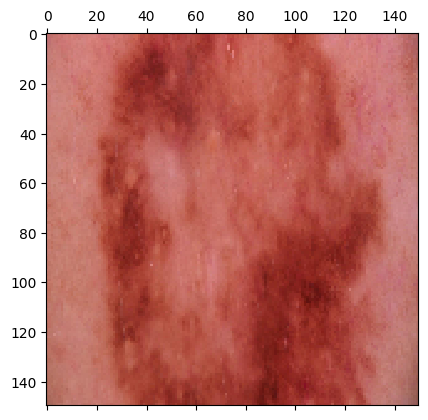

ISIC_2033237.jpg
1/1 [==============================] - 0s 157ms/step
predictions:[[0.93356705 0.06643295]] category:0


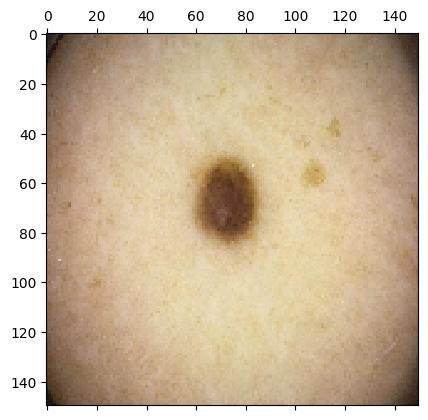

ISIC_2077116.jpg
1/1 [==============================] - 0s 163ms/step
predictions:[[0.9426274  0.05737258]] category:0


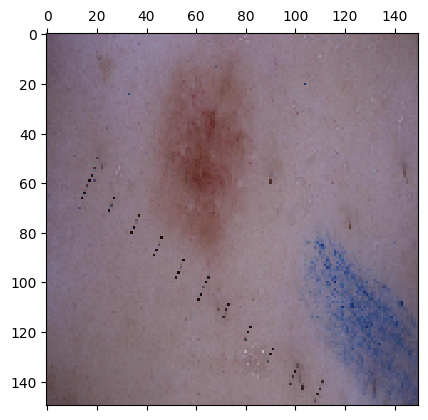

ISIC_2153401.jpg
1/1 [==============================] - 0s 95ms/step
predictions:[[0.896212   0.10378803]] category:0


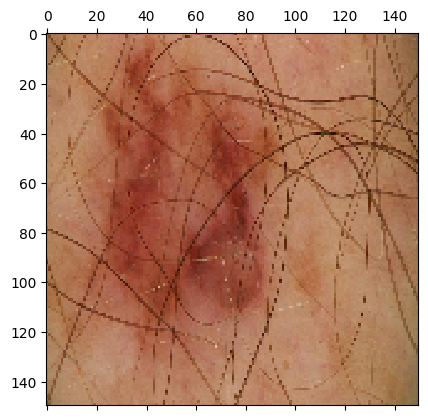

ISIC_2408815.jpg
1/1 [==============================] - 0s 89ms/step
predictions:[[0.9527597  0.04724029]] category:0


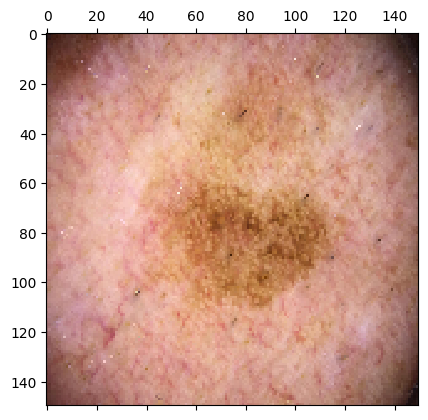

ISIC_2535541.jpg
1/1 [==============================] - 0s 99ms/step
predictions:[[0.5665272  0.43347278]] category:0


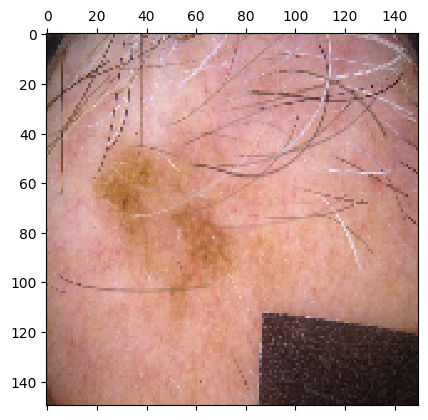

ISIC_2787702.jpg
1/1 [==============================] - 0s 125ms/step
predictions:[[0.95894617 0.04105388]] category:0


In [ ]:
channels =3
#model = load_model("gdrive/MyDrive/data_sets/cats_dogs/CatDog_train.h5")
counter = 15

for category in ["benign 3000 RESIZE/","validation malignant 50/"]: 

  path = "/content/drive/MyDrive/data/validation/" +category
  for i in os.listdir(path)[0:15]:
      img = load_img(path+i, grayscale=False,target_size=(150, 150))

      plt.matshow(img)
      plt.show()
      print(i)
      img = img_to_array(img)
      img = img.reshape(1, 150, 150, channels).astype('float32')
      img = img / 255.0

      preds = model.predict(img)
      print("predictions:{} category:{}".format(preds,np.argmax(preds)))
  